# Problem 1: Tensorflow Implementation

For this part of the homework we run the same program as before, though this time with a Tensorflow implementation. To begin, we start by importing our modules, which includes Tensorflow 2.4 installed in a virtual environment through ```venv```:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Set and lock the seed value
tf.random.set_seed(42)

Next, we define the same inital variables as before:

In [2]:
n_walkers = 100
n_steps = 5000
t = np.arange(n_steps)

## 1 Dimension

Now we can start plotting our 1 dimensional random walk. The procedure is similar as in the numpy case, though this time we replace some functions with their Tensorflow counterparts. More specifically, we make the following substitutions to that notebook:```rng.choice``` -> ```tf.random.uniform```, ```.cumsum``` -> ```tf.math.cumsum```, ```np.average``` -> ```tf.math.reduce_mean```, ```np.sqrt``` -> ```tf.math.sqrt```, and ```np.sum``` -> ```
tf.math.reduce_sum```. These functions and their input parameters are defined [here](https://www.tensorflow.org/api_docs/python/tf) (more specifically, [here](https://www.tensorflow.org/api_docs/python/tf/random/uniform?hl=hr)). The most important function here is ```tf.random.uniform```, since it is what samples from a uniform distribution.

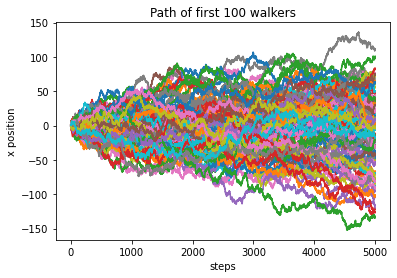

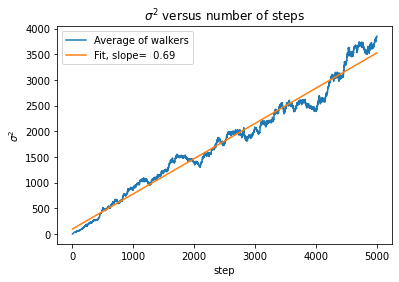

Diffusion coefficient = 0.3429315085756311
Percentage error = 31.41369828487378 %


In [3]:
dims = 1

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers,n_steps,dims)

# These are the steps at each stage
steps = tf.random.uniform(shape=step_shape, minval=-1,maxval=2, seed=1, dtype=tf.int32) 

# Now we add up the steps for each walker to get the x positions
x = tf.math.cumsum(steps,axis=1)   

# Now get the averages over the walkers
x2 = tf.math.reduce_mean(x**2, axis=0)  
x4 = tf.math.reduce_mean(x**4, axis=0)

sigma2_nd = tf.math.sqrt(tf.cast(x4, dtype=tf.float32) - tf.cast(x2, dtype=tf.float32)**2)
sigma2 = tf.math.reduce_sum(sigma2_nd, axis=1) 


for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1)
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/2)
print('Percentage error =', np.abs(res[0]/2 - 0.5) * (100/0.5), '%')

We see that once we understand some basic Tensorflow syntax, we are able to obtain similar as in the numpy case results but with considerably less effort.

## 2 Dimensions

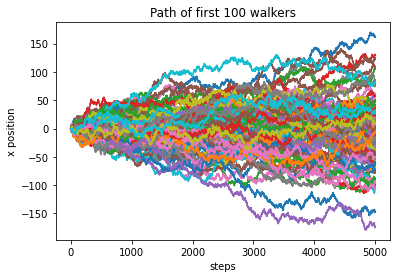

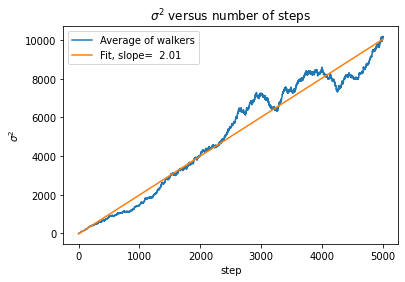

Diffusion coefficient = 0.5037133458973878
Percentage error = 0.742669179477562 %


In [4]:
dims = 2

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers,n_steps,dims)

# These are the steps at each stage
steps = tf.random.uniform(shape=step_shape, minval=-1,maxval=2, seed=1, dtype=tf.int32)

# Now we add up the steps for each walker to get the x positions
x = tf.math.cumsum(steps,axis=1)

# Now get the averages over the walkers
x2 = tf.math.reduce_mean(x**2, axis=0)
x4 = tf.math.reduce_mean(x**4, axis=0)

sigma2_nd = tf.math.sqrt(tf.cast(x4, dtype=tf.float32) - tf.cast(x2, dtype=tf.float32)**2)
sigma2 = tf.math.reduce_sum(sigma2_nd, axis=1)


for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1)
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/4)
print('Percentage error =', np.abs(res[0]/4 - 0.5) * (100/0.5), '%')

## 3 Dimensions

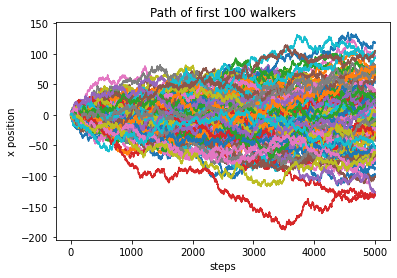

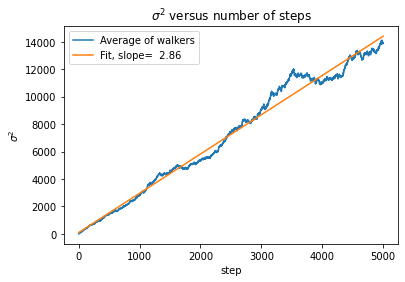

Diffusion coefficient = 0.47682414759689723
Percentage error = 4.635170480620554 %


In [5]:
dims = 3

# Walkers can go in + direction, - direction, or stay still
step_set = [-1, 0, 1]

# The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
# So, in 1d if there are 10 walkers making 100 steps each,
# it will be (10, 100, 1)
step_shape = (n_walkers,n_steps,dims)

# These are the steps at each stage
steps = tf.random.uniform(shape=step_shape, minval=-1,maxval=2, seed=1, dtype=tf.int32)

# Now we add up the steps for each walker to get the x positions
x = tf.math.cumsum(steps,axis=1)

# Now get the averages over the walkers
x2 = tf.math.reduce_mean(x**2, axis=0)
x4 = tf.math.reduce_mean(x**4, axis=0)

sigma2_nd = tf.math.sqrt(tf.cast(x4, dtype=tf.float32) - tf.cast(x2, dtype=tf.float32)**2)
sigma2 = tf.math.reduce_sum(sigma2_nd, axis=1)


for i in range( min(100,n_walkers) ):
    plt.plot( x[i,:,0] )
plt.title("Path of first 100 walkers")
plt.xlabel("steps")
plt.ylabel("x position")
plt.show()

plt.plot(sigma2, label='Average of walkers')
res = np.polyfit(t, sigma2,1)
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()
plt.show()

print('Diffusion coefficient =', res[0]/6)
print('Percentage error =', np.abs(res[0]/6 - 0.5) * (100/0.5), '%')